## XYZ Health Insurance Co. Ltd.

XYZ Health Insurance Co. Ltd. is one of the **prominent insurance providers** in the country.
- They offer impressive health plans and services to cater to the needs of different people.
- The insurance company also provides access to fitness assessment centers, wellness centers, diagnostic centers in addition to hospitalization centers.

Current Scenario
The company is planning to **introduce a new system that will help to easily monitor and predict the medical insurance prices** of their customers.

The current process suffers from the following problems:

- The company uses manpower to predict the medical expenses of its insurers. Many factors are considered such as age, BMI, smoking habits, number of children, etc.
- It is a time and resource-intensive process and many times, inaccurate.
- The company plans to modernize its legacy systems and wants to implement an automated way of predicting the medical expenses of its insurers based on various factors.

They have hired you as a data science consultant. They want to supplement their analysis and prediction with a more robust and accurate approach.

## Your Role
You are given a historical dataset that contains the medical charges of some of the insurers and many factors that determine those charges.
Your task is to build a regression model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

## Project Deliverables
- Deliverable: Predicts the medical charges of insurers.
- Machine Learning Task: Regression
- Target Variable: charges
- Win Condition: N/A (best possible model)

## Evaluation Metric
The model evaluation will be based on the R2 score.

In [1]:
import pandas as pd
import numpy as np
#-------------------------------------------#
import matplotlib
import matplotlib.pyplot as plt                                     
import seaborn as sns                                            
%matplotlib inline
#-------------------------------------------#
import warnings
warnings.filterwarnings('ignore')
#-------------------------------------------#

## Dataset Feature Description

The dataset feature contains following columns

|Id|Feature|Description|
|:--|:--|:--|
|01| age |Indicates the age of the primary beneficiary| 
|02| sex | Indicates the gender of the insurance contractor|  
|03| bmi | Indicates the BMI of the beneficiary| 
|04| children| Indicates number of children covered by health insurance / Number of dependents|   
|05| smoker| Indicates whether the beneficiary has smoking habits?|
|06| region| Indicates the region of residence of the beneficiary|
|07| id| Indicates the unique beneficiary id|
|08| charges| Indicates the individual medical costs billed by health insurance (Target Variable)|


## Loading the datasets

In [2]:
df1 = pd.read_csv(r'C:\Users\Mugdha\Music\GCDAI_9th May 2021\medical_cost_pred\train_data.csv')
df2 = pd.read_csv(r'C:\Users\Mugdha\Music\GCDAI_9th May 2021\medical_cost_pred\test_data.csv')

In [3]:
print('Shape of Train Dataset: ', df1.shape)
df1.head()

Shape of Train Dataset:  (1003, 8)


,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.655,0,no,northwest,693,2352.96845
1,28,female,26.510,2,no,southeast,1297,4340.44090
2,51,male,39.700,1,no,southwest,634,9391.34600
3,47,male,36.080,1,yes,southeast,1022,42211.13820
4,46,female,28.900,2,no,southwest,178,8823.27900


In [4]:
df1.describe()

,age,bmi,children,id,charges
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686,666.874377,13267.935817
std,14.039105,6.013107,1.204619,386.570442,12051.356547
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.210000,0.000000,329.500000,4780.839400
50%,39.000000,30.200000,1.000000,675.000000,9447.382400
75%,51.000000,34.430000,2.000000,1001.500000,16840.667970
max,64.000000,53.130000,5.000000,1337.000000,62592.873090


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


In [6]:
print('Shape of Test Dataset: ', df2.shape)
df2.head()

Shape of Test Dataset:  (335, 7)


,age,sex,bmi,children,smoker,region,id
0,45,female,25.175,2,no,northeast,764
1,36,female,30.020,0,no,northwest,887
2,64,female,26.885,0,yes,northwest,890
3,46,male,25.745,3,no,northwest,1293
4,19,male,31.920,0,yes,northwest,259


In [7]:
df2.describe()

,age,bmi,children,id
count,335.000000,335.000000,335.000000,335.000000
mean,39.062687,31.117343,1.065672,673.367164
std,14.102457,6.333625,1.209438,386.392527
min,18.000000,16.815000,0.000000,10.000000
25%,26.000000,26.505000,0.000000,348.000000
50%,39.000000,30.800000,1.000000,650.000000
75%,51.000000,35.272500,2.000000,1019.500000
max,64.000000,52.580000,5.000000,1334.000000


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       335 non-null    int64  
 1   sex       335 non-null    object 
 2   bmi       335 non-null    float64
 3   children  335 non-null    int64  
 4   smoker    335 non-null    object 
 5   region    335 non-null    object 
 6   id        335 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 18.4+ KB


In [9]:
print('Train dataset Contains Duplicate Rows?',df1.duplicated().any())
print('Test dataset Contains Duplicate Rows?',df2.duplicated().any())

Train dataset Contains Duplicate Rows? False
Test dataset Contains Duplicate Rows? False


In [10]:
print('Missing value in Train dataset?',df1.isnull().sum().any())
print('Missing value in Test dataset?',df2.isnull().sum().any())

Missing value in Train dataset? False
Missing value in Test dataset? False


<AxesSubplot:xlabel='charges', ylabel='Density'>

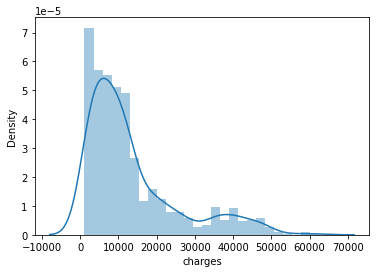

In [11]:
sns.distplot(df1['charges'], kde = True)

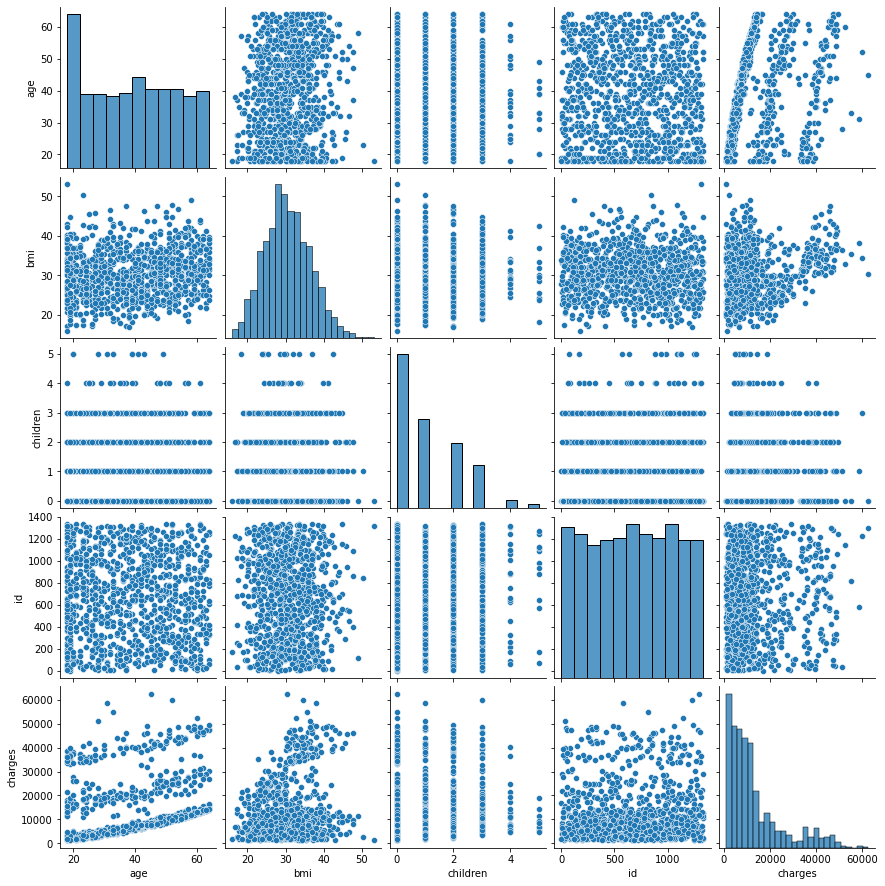

In [12]:
sns.pairplot(data = df1)

Text(0.5, 1.0, 'Correlation HeatMap')

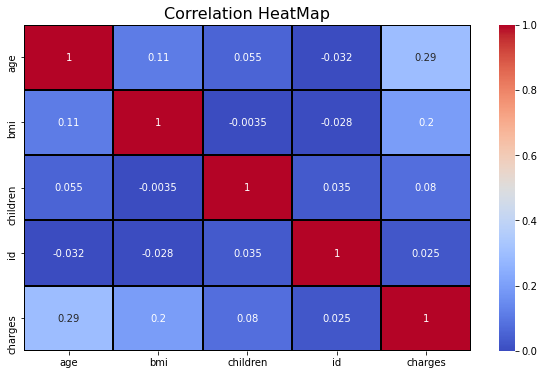

In [13]:
figure = plt.figure(figsize = (10,6))
HeatMap = sns.heatmap(df1.corr(),annot = True,cmap = 'coolwarm',vmin = 0, vmax = 1,linecolor = 'black',linewidths = 1)
HeatMap.set_title('Correlation HeatMap', fontdict = {'fontsize':16})

## Observations : 

### Train Dataset: 
- Shape of Dataset : **1003 rows and 8 columns.**
- **3 Categorical and 5 Numerical values.**
- 'Charges' is target feature.
- No missing value & duplicated value in dataset.
- **Target variable 'charges' is positively skewed.**

### Test Dataset
- Shape of Dataset : **335 rows and 7 columns.**
- **3 Categorical and 4 Numerical values.**
- Target feature 'charges' needs to be predicted.
- No missing value & duplicated value in dataset.

## EDA

In [14]:
df1['sex'].value_counts()

male      506
female    497
Name: sex, dtype: int64

In [15]:
df1['smoker'].value_counts()

no     797
yes    206
Name: smoker, dtype: int64

In [16]:
df1['region'].value_counts()

southeast    259
northeast    251
southwest    247
northwest    246
Name: region, dtype: int64

In [17]:
df1['age'].mean()

39.25523429710867

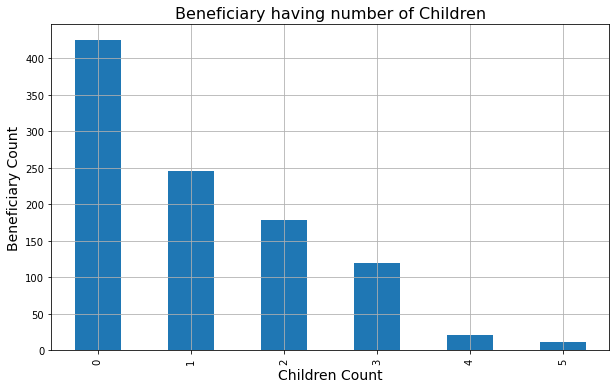

In [18]:
df1['children'].value_counts().plot(kind = 'bar', figsize = (10,6))
plt.title('Beneficiary having number of Children', size = 16)
plt.xlabel('Children Count', size = 14)
plt.ylabel('Beneficiary Count', size = 14)
plt.grid()

In [19]:
df1['bmi'].median()

30.2

<AxesSubplot:ylabel='Frequency'>

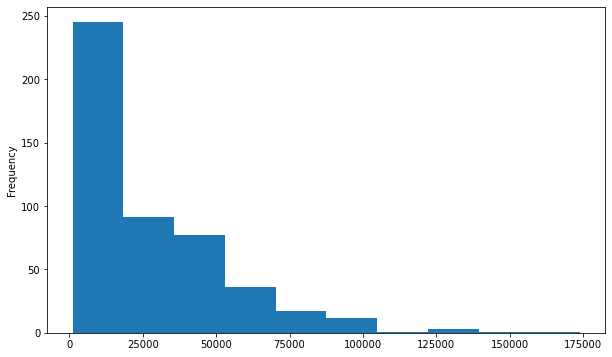

In [20]:
df1.groupby('bmi')['charges'].sum().plot(kind = 'hist', figsize = (10,6))

<AxesSubplot:ylabel='Frequency'>

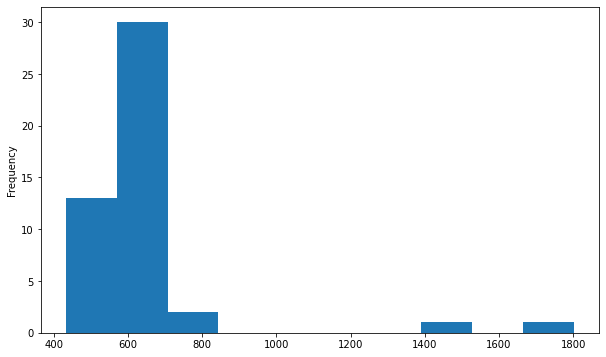

In [21]:
df1.groupby('age')['bmi'].sum().plot(kind = 'hist', figsize = (10,6))

## Observations made from EDA

- Sex : 506 male and 497 female in the dataset


## Data Pre-processing

### Converting categorical column using Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
# for train dataset #
df_num = df1.select_dtypes(include = ['int64','float64'])
df_cat = df1.drop(df_num, axis = 1)

# for test dataset #
df_num1 = df2.select_dtypes(include = ['int64','float64'])
df_cat1 = df2.drop(df_num1, axis = 1)

In [24]:
# for train dataset #
df_cat = df_cat.apply(le.fit_transform)

# for test dataset #
df_cat1 = df_cat1.apply(le.fit_transform)

In [25]:
df_train = pd.concat([df_num, df_cat], axis = 1)
df_train.head(5)

,age,bmi,children,id,charges,sex,smoker,region
0,24,23.655,0,693,2352.96845,1,0,1
1,28,26.510,2,1297,4340.44090,0,0,2
2,51,39.700,1,634,9391.34600,1,0,3
3,47,36.080,1,1022,42211.13820,1,1,2
4,46,28.900,2,178,8823.27900,0,0,3


In [26]:
df_train = df_train[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'id', 'charges']]
df_train.head(5)

,age,sex,bmi,children,smoker,region,id,charges
0,24,1,23.655,0,0,1,693,2352.96845
1,28,0,26.510,2,0,2,1297,4340.44090
2,51,1,39.700,1,0,3,634,9391.34600
3,47,1,36.080,1,1,2,1022,42211.13820
4,46,0,28.900,2,0,3,178,8823.27900


In [27]:
df_test1 = pd.concat([df_num1, df_cat1], axis = 1)
df_test = df_test1[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'id']]
df_test.head()

,age,sex,bmi,children,smoker,region,id
0,45,0,25.175,2,0,0,764
1,36,0,30.020,0,0,1,887
2,64,0,26.885,0,1,1,890
3,46,1,25.745,3,0,1,1293
4,19,1,31.920,0,1,1,259


## Feature Extraction and Model selection

In [28]:
# for train dataset #
df_train_features = df_train.drop(['charges'], axis = 1)
df_train_target = df_train['charges']

In [29]:
print('Shape of Train data_features: ',df_train_features.shape)
print('Shape of Train data_target: ',df_train_target.shape)

Shape of Train data_features:  (1003, 7)
Shape of Train data_target:  (1003,)


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_train_features, df_train_target, test_size = 0.2, random_state = 4)

In [32]:
print('Shape of x train: ', X_train.shape)
print('Shape of x test: ', X_test.shape)
print('Shape of y train: ', y_train.shape)
print('Shape of y test: ', y_test.shape)

Shape of x train:  (802, 7)
Shape of x test:  (201, 7)
Shape of y train:  (802,)
Shape of y test:  (201,)


## Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [34]:
numeric_features = X_train[['age', 'bmi']].columns
numeric_features

Index(['age', 'bmi'], dtype='object')

In [35]:
X_train[numeric_features] = sc.fit_transform(X_train[numeric_features])

In [36]:
X_test[numeric_features] = sc.transform(X_test[numeric_features])

In [37]:
X_train.head()

,age,sex,bmi,children,smoker,region,id
511,-1.198620,0,0.675749,2,0,0,760
643,1.765286,0,1.420961,3,0,2,603
112,-1.198620,1,0.845797,0,1,3,30
535,-0.140082,1,-1.034739,2,0,1,1200
374,-1.339759,1,0.026397,0,1,0,1042


In [38]:
X_test.head()

,age,sex,bmi,children,smoker,region,id
700,-0.634067,1,0.795783,0,1,3,19
577,0.706748,1,0.062240,0,1,3,1049
987,1.694717,1,1.040019,0,0,0,343
792,1.200732,0,1.897764,0,0,2,1172
520,-0.704636,1,0.645740,0,1,3,500


In [39]:
# Scaling done for Test dataset
df_test[numeric_features]= sc.fit_transform(df_test[numeric_features])
df_test.head()

#-------------Test dataset is ready for Machine Learning------------------#

,age,sex,bmi,children,smoker,region,id
0,0.421642,0,-0.939625,2,0,0,764
1,-0.217499,0,-0.173516,0,0,1,887
2,1.770941,0,-0.669234,0,1,1,890
3,0.492658,1,-0.849495,3,0,1,1293
4,-1.424766,1,0.126919,0,1,1,259


### Our trained model will be applied on this dataset (df_test)

## Training the Model

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [41]:
lr= LinearRegression()
rfr= RandomForestRegressor(n_estimators = 20, random_state = 0)

In [42]:
print('Linear Regression: ', lr.fit(X_train,y_train))         # Fitting the model (Study)
 
print('Random Forest: ', rfr.fit(X_train, y_train))

Linear Regression:  LinearRegression()
Random Forest:  RandomForestRegressor(n_estimators=20, random_state=0)


In [43]:
y_pred_train_lr = lr.predict(X_train)        #(Exam) Making prediction using training model for both train and test set
y_pred_test_lr = lr.predict(X_test) 

In [44]:
y_pred_test_rf = rfr.predict(X_test)
y_pred_train_rf = rfr.predict(X_train)

In [45]:
from sklearn.metrics import r2_score

In [46]:
r2_score_train_RF = r2_score(y_train, y_pred_train_rf)
r2_score_test_RF = r2_score(y_test, y_pred_test_rf)

In [47]:
print('R2 score for Training set (Random_forest): ',r2_score_train_RF)
print('R2 score for testing set (Random_forest): ',r2_score_test_RF)

R2 score for Training set (Random_forest):  0.9761736621524228
R2 score for testing set (Random_forest):  0.8334452742765348


In [48]:
r2_score_train_LR = r2_score(y_train, y_pred_train_lr)
r2_score_test_LR = r2_score(y_test, y_pred_test_lr)

In [49]:
print('R2 score for Training set (Linear Regression): ',r2_score_train_LR)
print('R2 score for testing set (Linear Regression): ',r2_score_test_LR)

R2 score for Training set (Linear Regression):  0.7452573136219994
R2 score for testing set (Linear Regression):  0.740722090968222


## Predicting Medical Cost 

In [50]:
y_pred_test_final = rfr.predict(df_test)

In [51]:
y_pred_test_final

array([10833.053396 ,  5113.979065 , 27634.33241  , 10995.8251375,
       34168.03293  ,  7331.24362  ,  2097.31671  , 15061.485313 ,
        7498.2500005, 11716.3552885, 18684.241321 ,  6745.8066225,
        4884.3764975, 42920.699775 , 47680.608326 , 42400.3669925,
        9197.272125 , 41376.24862  , 18570.8819785, 29107.43258  ,
        7870.6967475,  8981.754637 ,  2285.204185 ,  5334.77099  ,
       13364.4746295, 13515.4983095, 12819.981855 ,  5854.543267 ,
        9632.5288365,  2233.8032775,  8066.758854 , 12557.626541 ,
        3630.7672405,  6578.670782 ,  4035.372678 , 12441.1729035,
        6184.930306 ,  8612.3614895, 24811.196266 , 38808.802175 ,
        5279.286399 ,  6744.9126805, 11792.79742  , 12744.6903365,
        7117.5695785, 19824.492716 ,  6405.9238805,  4160.77117  ,
       40399.47487  ,  4971.03359  , 14954.109873 ,  1988.3659125,
        6621.72109  ,  3179.6252735, 11448.7012545, 13722.114661 ,
        3521.30624  , 45139.1261055, 11663.614185 , 17957.2395

## Converting Array to Dataset

In [52]:
y_pred_test_final = pd.DataFrame(y_pred_test_final)

In [53]:
y_pred_test_final.head(5)

,0
0,10833.053396
1,5113.979065
2,27634.332410
3,10995.825137
4,34168.032930


In [54]:
data_submission = df_test['id']

## Preparing Submission File

In [55]:
submission_file = pd.concat([data_submission,y_pred_test_final], axis = 1)

In [56]:
submission_file

,id,0
0,764,10833.053396
1,887,5113.979065
2,890,27634.332410
3,1293,10995.825137
4,259,34168.032930
...,...,...
330,342,14470.784694
331,308,11828.060693
332,1128,6091.531251
333,503,17483.464912


## Saving Medical cost prediction in Excel File

In [57]:
submission_file.to_csv('medical_cost_prediction_submission.csv', header=False, index=False)